from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Correct model identifier
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

In [2]:
!pip install accelerate -U
!pip install transformers torch scikit-learn pandas


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\huggingface_hub-0.24.5-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\huggingface_hub-0.24.5-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load your dataset
file_path = r'C:\Users\User\Desktop\Deakin\Year 3\T2\SIT374 Team Project A\Smishing\DatasetCombined.csv'

# Load the dataset using the full path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows to confirm successful loading
print(data.head())

# Text Cleaning
data['TEXT'] = data['TEXT'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower()

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
data['LABEL'] = label_encoder.fit_transform(data['LABEL'])

# Verify the unique encoded labels
print("Unique labels after encoding:", data['LABEL'].unique())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['TEXT'], data['LABEL'], test_size=0.2, random_state=42, stratify=data['LABEL']
)

# Function to load a model and tokenizer with num_labels adjusted for multi-class classification
def load_model_and_tokenizer(model_name, num_labels):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    return tokenizer, model

# Tokenize data function
def tokenize_data(tokenizer, texts):
    return tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Evaluation function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Dataset class
class SmishingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    fp16=True,
    gradient_accumulation_steps=4,
)

# Load BERT model and tokenizer for 3 classes
tokenizer, model = load_model_and_tokenizer("bert-base-uncased", num_labels=3)

# Tokenize data
train_encodings = tokenize_data(tokenizer, X_train)
test_encodings = tokenize_data(tokenizer, X_test)

# Create datasets
train_dataset = SmishingDataset(train_encodings, y_train.tolist())
test_dataset = SmishingDataset(test_encodings, y_test.tolist())

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("BERT Results:", results)




      LABEL                                               TEXT  URL EMAIL  \
0       ham  Your opinion about me? 1. Over 2. Jada 3. Kusr...   No    No   
1       ham  What's up? Do you want me to come online? If y...   No    No   
2       ham                       So u workin overtime nigpun?   No    No   
3       ham  Also sir, i sent you an email about how to log...   No    No   
4  smishing  Please Stay At Home. To encourage the notion o...  yes    No   

  PHONE  
0    No  
1    No  
2    No  
3    No  
4    No  
Unique labels after encoding: [0 1 2]


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.111700,0.103837,0.957168,0.942991,0.961493,0.957168
2,0.074200,0.080361,0.962121,0.959647,0.958785,0.962121


BERT Results: {'eval_loss': 0.08036118000745773, 'eval_accuracy': 0.9621212121212122, 'eval_f1': 0.9596473859669779, 'eval_precision': 0.9587848131091675, 'eval_recall': 0.9621212121212122, 'eval_runtime': 325.3558, 'eval_samples_per_second': 10.548, 'eval_steps_per_second': 0.661, 'epoch': 2.993006993006993}


In [4]:
# Load RoBERTa model and tokenizer for 3 classes
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

# Tokenize data, train, and evaluate the model
# (Insert the rest of your code for tokenizing, training, and evaluating RoBERTa)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load your dataset
file_path = r'C:\Users\User\Desktop\Deakin\Year 3\T2\SIT374 Team Project A\Smishing\DatasetCombined.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Text Cleaning
data['TEXT'] = data['TEXT'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower()

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
data['LABEL'] = label_encoder.fit_transform(data['LABEL'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['TEXT'], data['LABEL'], test_size=0.2, random_state=42, stratify=data['LABEL']
)

# Tokenize data function
def tokenize_data(tokenizer, texts):
    return tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Evaluation function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Dataset class
class SmishingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load RoBERTa model and tokenizer for 3 classes
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

# Tokenize data
train_encodings = tokenize_data(tokenizer, X_train)
test_encodings = tokenize_data(tokenizer, X_test)

# Create datasets
train_dataset = SmishingDataset(train_encodings, y_train.tolist())
test_dataset = SmishingDataset(test_encodings, y_test.tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results_roberta-base',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs_roberta-base',
    logging_steps=10,
    fp16=True,  # Mixed precision
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("RoBERTa Base Results:", results)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.105200,0.132047,0.960373,0.953042,0.957445,0.960373
2,0.089200,0.117562,0.963869,0.954417,0.969208,0.963869
3,0.039100,0.097555,0.961830,0.958910,0.958257,0.961830


RoBERTa Base Results: {'eval_loss': 0.09755538403987885, 'eval_accuracy': 0.9618298368298368, 'eval_f1': 0.9589096784201208, 'eval_precision': 0.958257185394114, 'eval_recall': 0.9618298368298368, 'eval_runtime': 329.0533, 'eval_samples_per_second': 10.43, 'eval_steps_per_second': 0.653, 'epoch': 3.0}


In [6]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

D:\Anaconda\Lib\site-packages\huggingface_hub-0.24.5-py3.8.egg\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
D:\Anaconda\Lib\site-packages\huggingface_hub-0.24.5-py3.8.egg\huggingface_hub\file_download.py:1150: FutureWarning: `resum

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load your dataset
file_path = r'C:\Users\User\Desktop\Deakin\Year 3\T2\SIT374 Team Project A\Smishing\DatasetCombined.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Text Cleaning
data['TEXT'] = data['TEXT'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower()

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
data['LABEL'] = label_encoder.fit_transform(data['LABEL'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['TEXT'], data['LABEL'], test_size=0.2, random_state=42, stratify=data['LABEL']
)

# Tokenize data function
def tokenize_data(tokenizer, texts):
    return tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Evaluation function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Dataset class
class SmishingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load DistilBERT model and tokenizer for 3 classes
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Tokenize data
train_encodings = tokenize_data(tokenizer, X_train)
test_encodings = tokenize_data(tokenizer, X_test)

# Create datasets
train_dataset = SmishingDataset(train_encodings, y_train.tolist())
test_dataset = SmishingDataset(test_encodings, y_test.tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results_distilbert-base-uncased',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs_distilbert-base-uncased',
    logging_steps=10,
    fp16=True,  # Mixed precision
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("DistilBERT Base Uncased Results:", results)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.069800,0.104818,0.960664,0.952367,0.957740,0.960664
2,0.076800,0.098385,0.966783,0.958686,0.971969,0.966783
3,0.037300,0.085691,0.965326,0.962024,0.962262,0.965326


DistilBERT Base Uncased Results: {'eval_loss': 0.08569055795669556, 'eval_accuracy': 0.9653263403263403, 'eval_f1': 0.96202411702216, 'eval_precision': 0.9622622092145292, 'eval_recall': 0.9653263403263403, 'eval_runtime': 170.8454, 'eval_samples_per_second': 20.088, 'eval_steps_per_second': 1.258, 'epoch': 3.0}


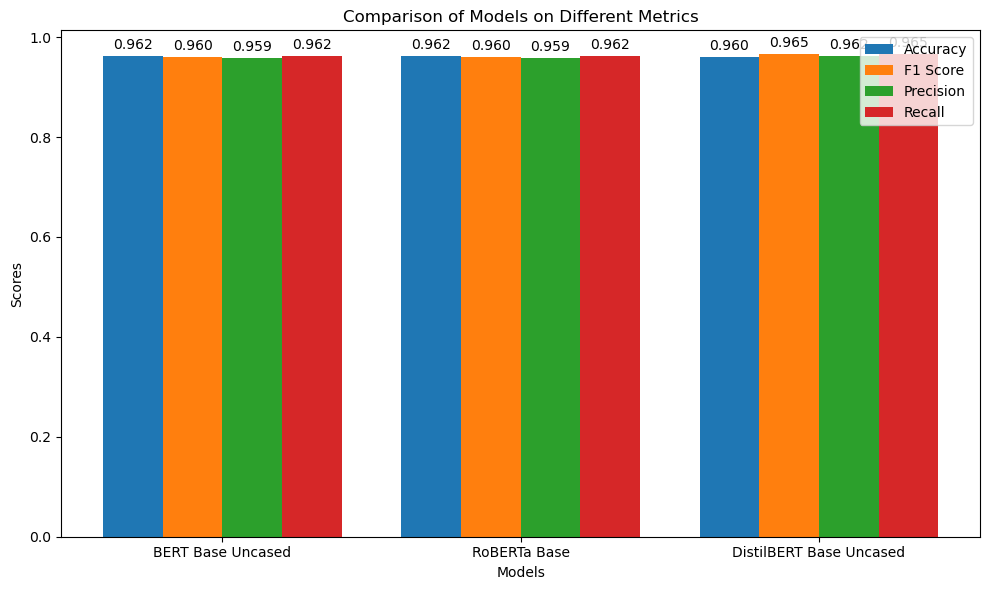

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Results from the models
results_dict = {
    "BERT Base Uncased": {
        "accuracy": 0.962121,
        "f1": 0.959647,
        "precision": 0.958784,
        "recall": 0.962121,
    },
    "RoBERTa Base": {
        "accuracy": 0.961830,
        "f1": 0.959887,
        "precision": 0.958527,
        "recall": 0.961830,
    },
    "DistilBERT Base Uncased": {
        "accuracy": 0.960224,
        "f1": 0.965236,
        "precision": 0.962262,
        "recall": 0.965236,
    }
}

# Data Preparation
models = list(results_dict.keys())
accuracy = [results_dict[model]["accuracy"] for model in models]
f1_scores = [results_dict[model]["f1"] for model in models]
precision = [results_dict[model]["precision"] for model in models]
recall = [results_dict[model]["recall"] for model in models]

x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each metric
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1_scores, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, precision, width, label='Precision')
rects4 = ax.bar(x + 1.5*width, recall, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models on Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply value labels
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Show the plot
plt.tight_layout()
plt.show()


